In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

,petrol,diesel
Date,,
2003-06-09,74.59,76.77
2003-06-16,74.47,76.69
2003-06-23,74.42,76.62
2003-06-30,74.35,76.51
2003-07-07,74.28,76.46


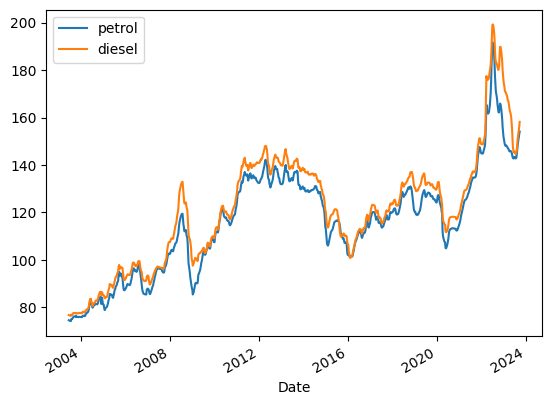

In [2]:
# Extract data from the spreadsheet.
# Parse the 'Date' column as a datetime object and set this as the index.
df = pd.read_excel('./data/Weekly_Fuel_Prices_180923.xlsx', sheet_name='Data', parse_dates=['Date'], index_col='Date')

df.sort_index(inplace=True)

df.plot()
df.head()

In [3]:
def logistic_growth(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def fit_logistic_growth(data, column):
    x_data = np.arange(len(data))
    y_data = data[column].values

    # Initial parameter guess
    p0 = [max(y_data), 1, np.median(x_data)]

    # Fit the curve
    params, covariance = curve_fit(logistic_growth, x_data, y_data, p0=p0)

    return params

In [4]:
# Fit the logistic growth model to 'petrol' data
params_petrol = fit_logistic_growth(df, 'petrol')

# Fit the logistic growth model to 'diesel' data
params_diesel = fit_logistic_growth(df, 'diesel')

print(params_petrol)
print(params_diesel)

[ 1.33955316e+02  4.32490991e-03 -3.45442882e+01]
[ 1.41056305e+02  4.14444218e-03 -3.26345793e+01]


In [7]:
# Create a new DataFrame for forecasting
forecast_dates = pd.date_range(start='2023-09-25', end='2024-12-31', freq='W-Mon')
df_forecast = pd.DataFrame({'Date': forecast_dates})

In [8]:
# Predict future values for 'petrol' and 'diesel' using the fitted models
df_forecast['petrol'] = logistic_growth(np.arange(len(df), len(df) + len(df_forecast)), *params_petrol)
df_forecast['diesel'] = logistic_growth(np.arange(len(df), len(df) + len(df_forecast)), *params_diesel)

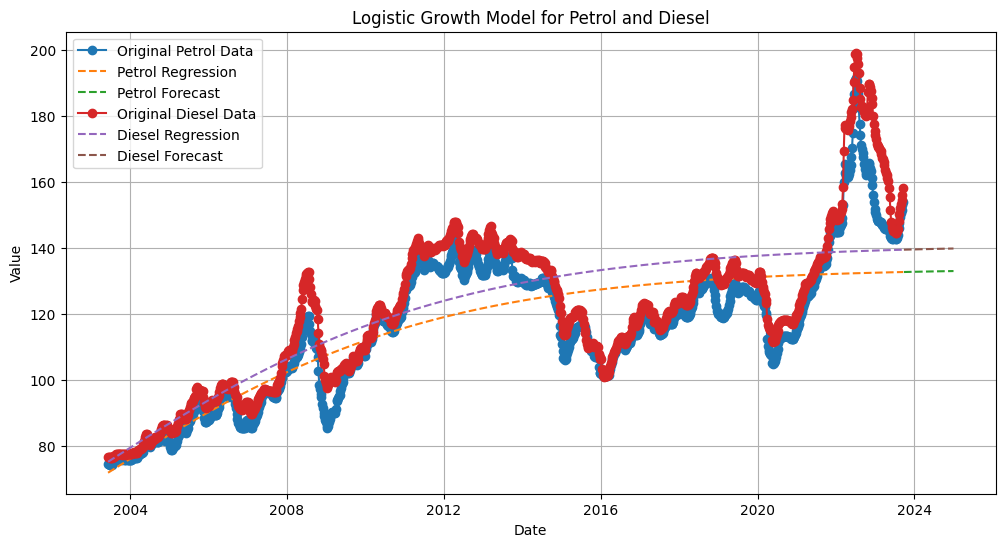

In [11]:
# Plot the original data, regression, and forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['petrol'], label='Original Petrol Data', marker='o', linestyle='-')
plt.plot(df.index, logistic_growth(np.arange(len(df)), *params_petrol), label='Petrol Regression', linestyle='--')
plt.plot(df_forecast['Date'], df_forecast['petrol'], label='Petrol Forecast', linestyle='--')
plt.plot(df.index, df['diesel'], label='Original Diesel Data', marker='o', linestyle='-')
plt.plot(df.index, logistic_growth(np.arange(len(df)), *params_diesel), label='Diesel Regression', linestyle='--')
plt.plot(df_forecast['Date'], df_forecast['diesel'], label='Diesel Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Logistic Growth Model for Petrol and Diesel')
plt.legend()
plt.grid(True)
plt.show()